# Sentiment Analysis for Amazon Reviews

In [2]:
import kagglehub
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("datafiniti/consumer-reviews-of-amazon-products")
file_path1 = f"{path}/1429_1.csv"
file_path2 = f"{path}/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv"
file_path3 = f"{path}/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv"
print("Path to dataset files:", path)

# Load the dataset
data1 = pd.read_csv(file_path1)
data2 = pd.read_csv(file_path2)
data3 = pd.read_csv(file_path3)

100%|██████████| 16.3M/16.3M [00:01<00:00, 16.9MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/datafiniti/consumer-reviews-of-amazon-products/versions/5


<ipython-input-2-98ffa5fa0a5e>:12: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  data1 = pd.read_csv(file_path1)


In [3]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer



# Combine the datasets

data = pd.merge(data1, data2, how='outer')
data = pd.merge(data, data3, how='outer')




# Remove duplicates if necessary
data.drop_duplicates(inplace=True)

# Step 5: Save the Combined Dataset
data.to_csv('combined_data.csv', index=False)

print("Data successfully combined and saved to 'combined_data.csv'.")


# Inspect the first few rows of the data
print("Data Head:")
print(data.head())

# Check for any missing values
print("Missing Values in Data:")
print(data.isnull().sum())

# Display basic statistics for the data
print("Data Statistics:")
print(data.describe())

# Display columns to understand the structure
print("Data Columns:")
print(data.columns)



Data successfully combined and saved to 'combined_data.csv'.
Data Head:
                     id                                               name  \
0  AV-ETMhgYSSHbkXwpNb9  All-New Kindle Oasis E-reader - 7 High-Resolut...   
1  AV-ETMhgYSSHbkXwpNb9  All-New Kindle Oasis E-reader - 7 High-Resolut...   
2  AV-ETMhgYSSHbkXwpNb9  All-New Kindle Oasis E-reader - 7 High-Resolut...   
3  AV-ETMhgYSSHbkXwpNb9  All-New Kindle Oasis E-reader - 7 High-Resolut...   
4  AV-EVZITKZqtpbFMSoqc  All-New Kindle Oasis E-reader - 7 High-Resolut...   

        asins   brand                                         categories  \
0  B06VTJWRJW  Amazon  Featured Brands,E-Readers & Accessories,EBook ...   
1  B06VTJWRJW  Amazon  Featured Brands,E-Readers & Accessories,EBook ...   
2  B06VTJWRJW  Amazon  Featured Brands,E-Readers & Accessories,EBook ...   
3  B06VTJWRJW  Amazon  Featured Brands,E-Readers & Accessories,EBook ...   
4  B06XD5YCKX  Amazon  EBook Readers,Tablets,Electronics,Amazon Eread...   

  

## Drop unecessary columns

In [ ]:
# Columns to drop
columns_to_drop = [
    'id', 'name', 'asins', 'brand', 'categories', 'keys', 'manufacturer',
    'reviews.date', 'reviews.dateAdded', 'reviews.dateSeen', 'reviews.didPurchase',
    'reviews.id', 'reviews.sourceURLs', 'reviews.userCity', 'reviews.userProvince', 'reviews.username', 'primaryCategories',
    'imageURLs', 'manufacturerNumber',  'sourceURLs', 'dateUpdated', 'dateAdded'
]

# Drop the columns
data_cleaned = data.drop(columns=columns_to_drop)

# Rename columns

data_cleaned.columns = data_cleaned.columns.str.replace('reviews.', '', regex=False)

# Display columns to confirm the drop
print("Data Columns After Dropping:")
print(data_cleaned.columns)


Data Columns After Dropping:
Index(['doRecommend', 'numHelpful', 'rating', 'text', 'title'], dtype='object')


## Check for missing values

In [ ]:
# Check for any missing values
print("Missing Values in Data:")
print(data_cleaned.isnull().sum())

Missing Values in Data:
doRecommend    12840
numHelpful     12746
rating            33
text               1
title             19
dtype: int64


## Drop rows missing text and rating

In [ ]:
# Drop rows with missing 'text' and 'rating'
data_cleaned = data_cleaned.dropna(subset=['text', 'rating'])

# Check for any remaining missing values
print("Missing Values in Data After Dropping Rows:")
print(data_cleaned.isnull().sum())

Missing Values in Data After Dropping Rows:
doRecommend    12806
numHelpful     12712
rating             0
text               0
title             19
dtype: int64


## Plot the Distribution of Rating and doRecommend

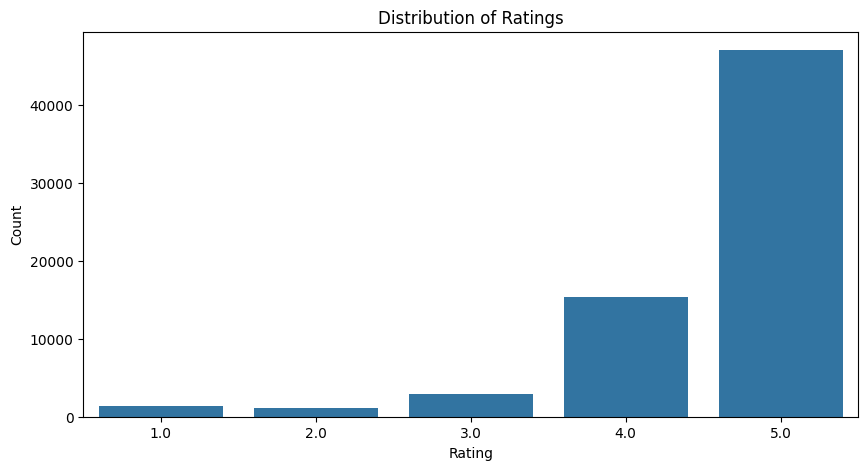

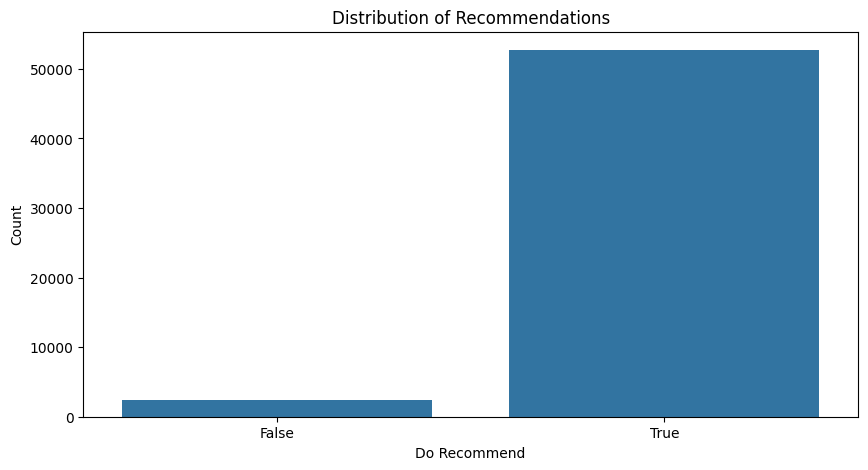

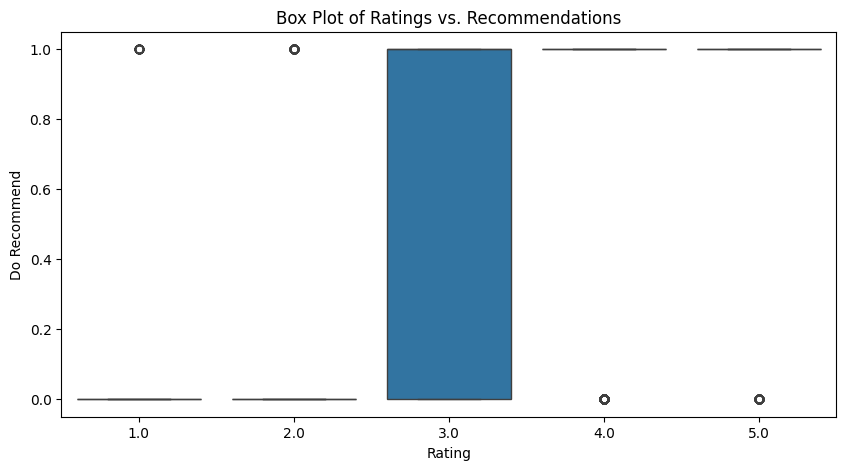

Number of distinct values: rating
5.0    47084
4.0    15377
3.0     2898
1.0     1434
2.0     1071
Name: count, dtype: int64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns



# Plot the distribution of ratings
plt.figure(figsize=(10, 5))
sns.countplot(data=data_cleaned, x='rating')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Plot the distribution of doRecommend
plt.figure(figsize=(10, 5))
sns.countplot(data=data_cleaned, x='doRecommend')
plt.title('Distribution of Recommendations')
plt.xlabel('Do Recommend')
plt.ylabel('Count')
plt.show()

# Joint plot to explore correlation
plt.figure(figsize=(10, 5))
sns.boxplot(x='rating', y='doRecommend', data=data_cleaned)
plt.title('Box Plot of Ratings vs. Recommendations')
plt.xlabel('Rating')
plt.ylabel('Do Recommend')
plt.show()

distinct_count = data_cleaned['rating'].value_counts()
print(f"Number of distinct values: {distinct_count}")


## Calculate Review Length

In [ ]:
# Calculate the length of each review
data_cleaned['review_length'] = data_cleaned['text'].apply(len)

# Display the first few rows to confirm the new column
print(data_cleaned[['text', 'review_length']].head())


                                                text  review_length
0  Bought the new Oasis for my wife. She already ...           1103
1  The best Kindle ever, for me, is still the hug...            710
2  I absolutely love this reader. The bigger scre...            132
3  I always use it when i read ebook ,i like it a...             50
4  Love bigger screen, bold fonts, auto rotate & ...            171


## Correlation between review lenght and rating

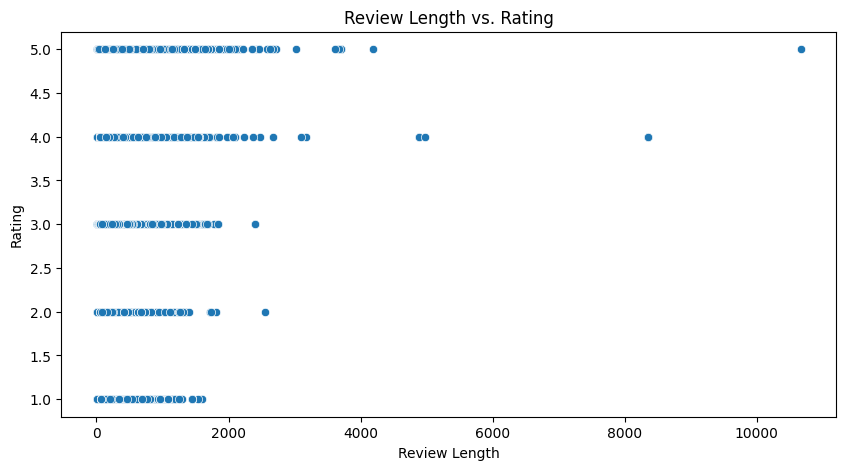

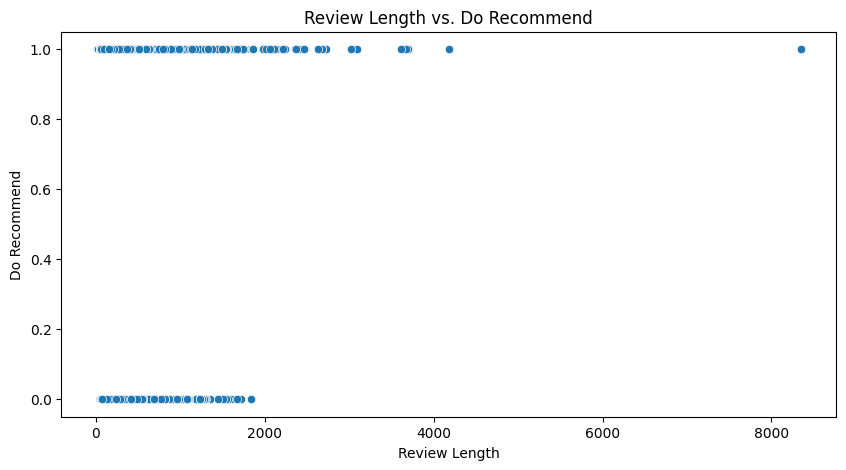

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of review length vs. rating
plt.figure(figsize=(10, 5))
sns.scatterplot(data=data_cleaned, x='review_length', y='rating')
plt.title('Review Length vs. Rating')
plt.xlabel('Review Length')
plt.ylabel('Rating')
plt.show()

# Scatter plot of review length vs. doRecommend
plt.figure(figsize=(10, 5))
sns.scatterplot(data=data_cleaned, x='review_length', y='doRecommend')
plt.title('Review Length vs. Do Recommend')
plt.xlabel('Review Length')
plt.ylabel('Do Recommend')
plt.show()


In [ ]:
# Calculate correlation coefficient between review length and rating
correlation_rating = data_cleaned['review_length'].corr(data_cleaned['rating'])
print(f'Correlation between Review Length and Rating: {correlation_rating:.2f}')

# Calculate correlation coefficient between review length and doRecommend
correlation_doRecommend = data_cleaned['review_length'].corr(data_cleaned['doRecommend'])
print(f'Correlation between Review Length and Do Recommend: {correlation_doRecommend:.2f}')


Correlation between Review Length and Rating: -0.11
Correlation between Review Length and Do Recommend: -0.08


## encode ratings into positive (2), neutral (1), negative (0)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to categorize ratings
def categorize_rating(rating):
    if rating in [4, 5]:
        return 2  # Positive
    elif rating == 3:
        return 1  # Neutral
    else:
        return 0  # Negative

# Apply the function to the rating column
data_cleaned['sentiment'] = data_cleaned['rating'].apply(categorize_rating)

# Display the first few rows to confirm the new column
print(data_cleaned[['rating', 'sentiment']].head())

# Check the distribution of the new categories
print("Distribution of Rating Categories:")
print(data_cleaned['sentiment'].value_counts())

# Plot the distribution of Sentiment
plt.figure(figsize=(10, 5))
sns.countplot(data=data_cleaned, x='sentiment')
plt.title('Distribution of Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()




NameError: name 'data_cleaned' is not defined

## Word clouds

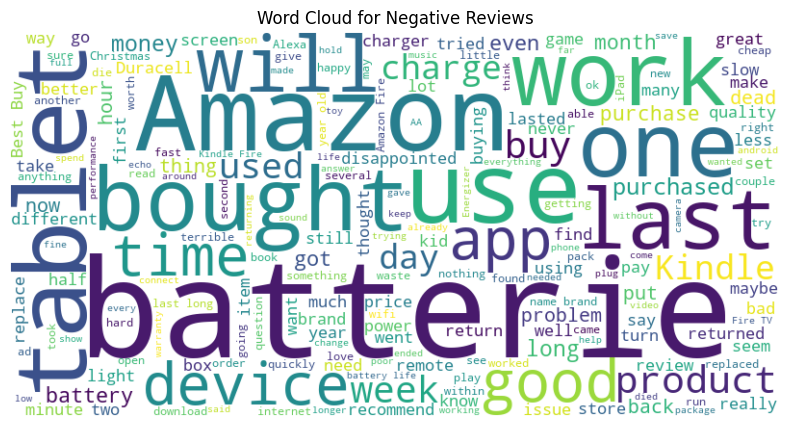

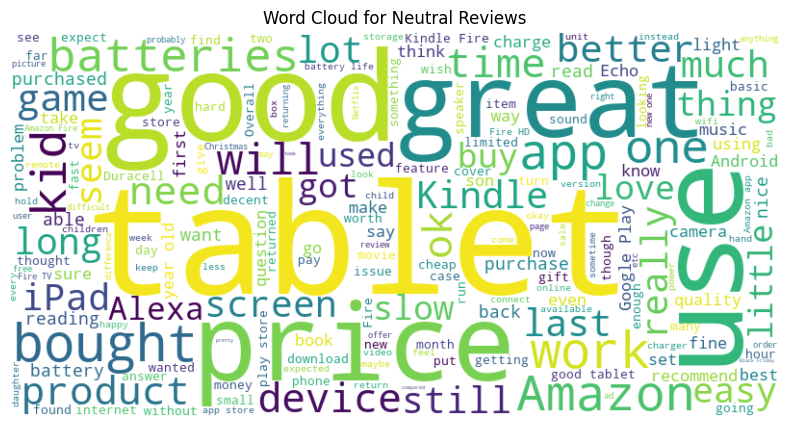

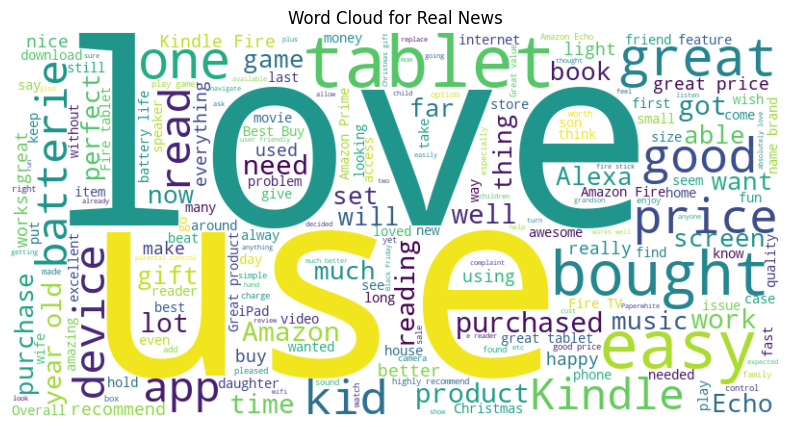

In [ ]:
from wordcloud import WordCloud

# Generate word clouds
negative = ' '.join(data_cleaned[data_cleaned['sentiment'] == 0]['text'])
neutral = ' '.join(data_cleaned[data_cleaned['sentiment'] == 1]['text'])
positive = ' '.join(data_cleaned[data_cleaned['sentiment'] == 2]['text'])

# Word cloud for negatige reviews
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Reviews')
plt.show()


# Word cloud for neutral reviews
wordcloud_neutral = WordCloud(width=800, height=400, background_color='white').generate(neutral)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Neutral Reviews')
plt.show()

# Word cloud for positive reviews
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Real News')
plt.show()

## Data Cleaning (Lowercase, Remove Stopwords, Lemmatization)

In [ ]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from imblearn.over_sampling import SMOTE


# Download NLTK stopwords and WordNet data if not already done
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

# Define additional stop words
additional_stop_words = {'tablet', 'amazon', 'kindle', 'bought', 'one', 'use'}


# Define the preprocessing function
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra whitespace
    stop_words = set(stopwords.words('english')).union(additional_stop_words)
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    lemmatizer = WordNetLemmatizer()
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])  # Lemmatization
    return text

# Apply preprocessing
data_cleaned['cleaned_text'] = data_cleaned['text'].apply(preprocess_text)



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jaime\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jaime\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Split the data into training and testing sets

In [ ]:
from sklearn.model_selection import train_test_split


# Feature matrix (X) and target vector (Y)
X = data_cleaned['cleaned_text']
Y = data_cleaned['sentiment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


## Vectorization

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize the text data
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

## Resampling

In [ ]:
# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_vectorized, y_train)

# Confirm the resampling
print("Original training set class distribution:")
print(y_train.value_counts())
print("\nResampled training set class distribution:")
print(pd.Series(y_train_resampled).value_counts())

Original training set class distribution:
sentiment
2    49941
1     2361
0     1988
Name: count, dtype: int64

Resampled training set class distribution:
sentiment
2    49941
1    49941
0    49941
Name: count, dtype: int64


## Train and Evaluate models

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import pandas as pd

# Function to evaluate model performance
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1 Score: {f1:.2f}')
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    print('Classification Report:')
    print(classification_report(y_test, y_pred))

# Train and evaluate models
def train_and_evaluate_models(X_train_resampled, y_train_resampled, X_test_vectorized, y_test):
    models = {
        'Random Forest': RandomForestClassifier(random_state=42),
        'Gradient Boosting': GradientBoostingClassifier(random_state=42),
        'XGBoost': XGBClassifier(random_state=42),
        'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42)
    }

    for name, model in models.items():
        print(f'\nTraining {name}...')
        model.fit(X_train_resampled, y_train_resampled)
        print(f'Evaluating {name}...')
        evaluate_model(model, X_test_vectorized, y_test)


In [ ]:
# Train and evaluate models
train_and_evaluate_models(X_train_resampled, y_train_resampled, X_test_vectorized, y_test)



Training Random Forest...
Evaluating Random Forest...
Accuracy: 0.95
Precision: 0.95
Recall: 0.95
F1 Score: 0.95
Confusion Matrix:
[[  306    17   194]
 [   23   233   281]
 [   53    70 12396]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.59      0.68       517
           1       0.73      0.43      0.54       537
           2       0.96      0.99      0.98     12519

    accuracy                           0.95     13573
   macro avg       0.83      0.67      0.73     13573
weighted avg       0.95      0.95      0.95     13573


Training Gradient Boosting...
Evaluating Gradient Boosting...
Accuracy: 0.74
Precision: 0.92
Recall: 0.74
F1 Score: 0.81
Confusion Matrix:
[[ 323  153   41]
 [  79  312  146]
 [ 728 2413 9378]]
Classification Report:
              precision    recall  f1-score   support

           0       0.29      0.62      0.39       517
           1       0.11      0.58      0.18       537
           2       

## Class Weight Adjustment in Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Define the model with class weights
class_weights = {0: 2, 1: 2, 2: 1}
rf_model = RandomForestClassifier(random_state=42, class_weight=class_weights)

# Train the model
rf_model.fit(X_train_resampled, y_train_resampled)

# Evaluate the model
evaluate_model(rf_model, X_test_vectorized, y_test)


Accuracy: 0.95
Precision: 0.95
Recall: 0.95
F1 Score: 0.95
Confusion Matrix:
[[  315    12   190]
 [   22   235   280]
 [   48    68 12403]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.61      0.70       517
           1       0.75      0.44      0.55       537
           2       0.96      0.99      0.98     12519

    accuracy                           0.95     13573
   macro avg       0.84      0.68      0.74     13573
weighted avg       0.95      0.95      0.95     13573



## Biderectional LSTM model

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.utils import to_categorical
import numpy as np




# Encode target labels
label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y)
Y_categorical = to_categorical(Y_encoded)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y_categorical, test_size=0.2, random_state=42)

# Tokenize and pad sequences
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

max_sequence_length = max([len(x) for x in X_train_sequences])
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_sequence_length)
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_sequence_length)

# Build the Bidirectional LSTM model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=max_sequence_length))
model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train_padded, y_train, epochs=10, batch_size=64, validation_data=(X_test_padded, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test_padded, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

# Make predictions
y_pred = model.predict(X_test_padded)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Convert integer class labels to string format
target_names = list(map(str, label_encoder.classes_))

# Print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test_classes, y_pred_classes, target_names=label_encoder.classes_))


## Hyperparameter Tuning with Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the Random Forest model with class weights
rf = RandomForestClassifier(class_weight='balanced', random_state=42)

# Initialize the Grid Search model
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='f1_weighted')

# Fit the Grid Search model
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f'Best Parameters: {best_params}')
print(f'Best F1 Score: {best_score}')


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Best F1 Score: 0.9931117563745216


In [ ]:
evaluate_model(grid_search, X_test_vectorized, y_test)

Accuracy: 0.96
Precision: 0.95
Recall: 0.96
F1 Score: 0.95
Confusion Matrix:
[[  295     9   213]
 [   16   224   297]
 [   28    37 12454]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.57      0.69       517
           1       0.83      0.42      0.56       537
           2       0.96      0.99      0.98     12519

    accuracy                           0.96     13573
   macro avg       0.89      0.66      0.74     13573
weighted avg       0.95      0.96      0.95     13573



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Define the model with class weights
class_weights = {0: 2, 1: 2, 2: 1}



# Best parameters from Grid Search
best_params = {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}

# Initialize the Random Forest model with the best parameters
rf_model = RandomForestClassifier(
    bootstrap=best_params['bootstrap'],
    max_depth=best_params['max_depth'],
    min_samples_leaf=best_params['min_samples_leaf'],
    min_samples_split=best_params['min_samples_split'],
    n_estimators=best_params['n_estimators'],
    random_state=42,
    class_weight=class_weights
)

# Train the model
rf_model.fit(X_train_resampled, y_train_resampled)

# Evaluate the model
evaluate_model(rf_model, X_test_vectorized, y_test)

Accuracy: 0.95
Precision: 0.95
Recall: 0.95
F1 Score: 0.95
Confusion Matrix:
[[  288    10   219]
 [   17   228   292]
 [   33    55 12431]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.56      0.67       517
           1       0.78      0.42      0.55       537
           2       0.96      0.99      0.98     12519

    accuracy                           0.95     13573
   macro avg       0.86      0.66      0.73     13573
weighted avg       0.95      0.95      0.95     13573



# Transformers

## Preprocessing

In [4]:

import pandas as pd
from sklearn.model_selection import train_test_split



# Drop N/As
data = data.dropna(subset=['reviews.text', 'reviews.rating'])

# Clean the text data
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply text cleaning
data['cleaned_text'] = data['reviews.text'].apply(clean_text)

# Function to reduce dataset while maintaining diversity
def reduce_data(df, target_column, num_samples=1000):
    reduced_df = pd.DataFrame()

    # Iterate through each unique rating
    for rating in df[target_column].unique():
        # Filter the data for the current rating
        rating_df = df[df[target_column] == rating]

        # Perform random sampling to get the desired number of samples
        if len(rating_df) > num_samples:
            rating_df = rating_df.sample(n=num_samples, random_state=42)

        # Append the sampled data to the reduced DataFrame
        reduced_df = pd.concat([reduced_df, rating_df], axis=0)

    return reduced_df

# Reduce the dataset
transformers_data = data.copy()

# Define a simple categorize_rating function if needed (example)
def categorize_rating(rating):
    if rating <= 2:
        return 0
    elif rating == 3:
        return 1
    else:
        return 2

# Apply sentiment categorization
transformers_data['sentiment'] = data['reviews.rating'].apply(categorize_rating)

# Reduce the dataset
transformers_data = reduce_data(transformers_data, 'sentiment', num_samples=2500)

# Drop unnecessary columns
columns_to_drop = [
    'id', 'name', 'asins', 'brand', 'categories', 'keys', 'manufacturer',
    'reviews.date', 'reviews.dateAdded', 'reviews.dateSeen', 'reviews.didPurchase',
    'reviews.id', 'reviews.sourceURLs', 'reviews.userCity', 'reviews.userProvince', 'reviews.username', 'primaryCategories',
    'imageURLs', 'manufacturerNumber', 'sourceURLs', 'dateUpdated', 'dateAdded', 'reviews.doRecommend',
    'reviews.numHelpful', 'reviews.rating', 'reviews.title', 'reviews.text'
]
# Verify the reduced dataset
print(transformers_data['reviews.rating'].value_counts())


transformers_data.drop(columns=columns_to_drop, inplace=True)






reviews.rating
3.0    2500
5.0    1887
1.0    1431
2.0    1069
4.0     613
Name: count, dtype: int64


In [ ]:
# Print the distribution of sentiment labels
print("Sentiment Label Distribution in Dataset:")
print(transformers_data['sentiment'].value_counts())


Sentiment Label Distribution in Dataset:
sentiment
2    2500
0    2500
1    2500
Name: count, dtype: int64


## Split the Data

In [ ]:
from sklearn.model_selection import train_test_split


# Assuming 'balanced_data' is your DataFrame after balancing
# Shuffle and split the dataset
train_data, val_data = train_test_split(transformers_data, test_size=0.2, random_state=42)



## Tokenize the Text Data

In [ ]:

import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, AdamW, get_linear_schedule_with_warmup

# Initialize the tokenizer
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

# Tokenize the text data
train_tokenized = tokenizer(train_data['cleaned_text'].tolist(), padding=True, truncation=True, max_length=512, return_tensors='pt')
val_tokenized = tokenizer(val_data['cleaned_text'].tolist(), padding=True, truncation=True, max_length=512, return_tensors='pt')

# Convert labels to tensor
train_labels = torch.tensor(train_data['sentiment'].values, dtype=torch.long)
val_labels = torch.tensor(val_data['sentiment'].values, dtype=torch.long)

# Create TensorDatasets
train_dataset = TensorDataset(train_tokenized['input_ids'], train_tokenized['attention_mask'], train_labels)
val_dataset = TensorDataset(val_tokenized['input_ids'], val_tokenized['attention_mask'], val_labels)

# Create DataLoaders
train_dataloader = DataLoader(train_dataset, sampler=RandomSampler(train_dataset), batch_size=32)
val_dataloader = DataLoader(val_dataset, sampler=SequentialSampler(val_dataset), batch_size=32)

# Verify the split
print(f"Training data size: {len(train_data)}")
print(f"Validation data size: {len(val_data)}")


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

Training data size: 6000
Validation data size: 1500


## Load the DistilBERT Model

In [ ]:
from transformers import DistilBertForSequenceClassification
import torch

# Load the pre-trained DistilBERT model
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=3)

# Define the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Move the model to the device
model.to(device)


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Using device: cuda


DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): DistilBertSdpaAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)


## Fine-tune the model

In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
from transformers import AdamW, get_linear_schedule_with_warmup




# Initialize the optimizer and scheduler
optimizer = AdamW(model.parameters(), lr=1e-5)
epochs = 4
total_steps = len(train_dataloader) * epochs
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)

# Training loop
for epoch in range(epochs):
    model.train()
    for step, batch in enumerate(train_dataloader):
        batch_input_ids, batch_attention_mask, batch_labels = [b.to(device) for b in batch]
        outputs = model(input_ids=batch_input_ids, attention_mask=batch_attention_mask, labels=batch_labels)
        loss = outputs.loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        scheduler.step()
    print(f"Epoch {epoch + 1} complete")

# Save the trained model
model.save_pretrained('distilbert_model')
tokenizer.save_pretrained('distilbert_tokenizer')


/usr/local/lib/python3.11/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1 complete
Epoch 2 complete
Epoch 3 complete
Epoch 4 complete


('distilbert_tokenizer/tokenizer_config.json',
 'distilbert_tokenizer/special_tokens_map.json',
 'distilbert_tokenizer/vocab.txt',
 'distilbert_tokenizer/added_tokens.json')

## Evaluate the Model

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import torch

# Evaluation loop
model.eval()
preds = []
true_labels = []

for batch in val_dataloader:
    batch_input_ids, batch_attention_mask, batch_labels = [b.to(device) for b in batch]
    with torch.no_grad():
        outputs = model(input_ids=batch_input_ids, attention_mask=batch_attention_mask)
        logits = outputs.logits
        preds.extend(torch.argmax(logits, axis=1).cpu().numpy())
        true_labels.extend(batch_labels.cpu().numpy())

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(true_labels, preds, target_names=['Negative', 'Neutral', 'Positive']))
print("Confusion Matrix:")
print(confusion_matrix(true_labels, preds))


Classification Report:
              precision    recall  f1-score   support

    Negative       0.82      0.82      0.82       492
     Neutral       0.68      0.67      0.67       481
    Positive       0.82      0.83      0.82       527

    accuracy                           0.77      1500
   macro avg       0.77      0.77      0.77      1500
weighted avg       0.77      0.77      0.77      1500

Confusion Matrix:
[[402  77  13]
 [ 74 322  85]
 [ 13  78 436]]


In [ ]:
!pip install streamlit pyngrok


## Dashboard

In [ ]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np



# Classification Report
report = classification_report(true_labels, preds, target_names=['Negative', 'Neutral', 'Positive'], output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Confusion Matrix
cm = confusion_matrix(true_labels, preds)
cm_df = pd.DataFrame(cm, index=['Negative', 'Neutral', 'Positive'], columns=['Negative', 'Neutral', 'Positive'])

# Streamlit App
st.title("Sentiment Analysis Model Performance")

st.header("Classification Report")
st.dataframe(report_df)

st.header("Confusion Matrix")
fig, ax = plt.subplots()
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted')
st.pyplot(fig)

st.header("Accuracy")
accuracy = np.trace(cm) / np.sum(cm)
st.write(f"Accuracy: {accuracy:.2f}")




Writing app.py


In [ ]:
!npm install localtunnel

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧
added 22 packages in 4s
⠧
⠧3 packages are looking for funding
⠧  run `npm fund` for details
⠧

In [ ]:
!streamlit run app.py &>/content/logs.txt &

In [ ]:
import urllib
print("Password/Enpoint IP for localtunnel is:",urllib.request.urlopen('https://ipv4.icanhazip.com').read().decode('utf8').strip("\n"))

Password/Enpoint IP for localtunnel is: 34.125.135.90


In [ ]:
!npx localtunnel --port 8501

⠙your url is: https://chatty-breads-throw.loca.lt
^C


# Let's try roBERTa now

## Initialize the RoBERTa Tokenizer

In [ ]:
from transformers import RobertaTokenizer

# Initialize the tokenizer
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')


## Tokenize the Text Data

In [ ]:
import torch
# Tokenize the text data
tokenized_data = tokenizer(transformers_data['cleaned_text'].tolist(), padding=True, truncation=True, max_length=512, return_tensors='pt')

# Convert labels to tensor (already in numerical format)
labels = torch.tensor(transformers_data['sentiment'].values, dtype=torch.long)


## Initialize the RoBERTa Model

In [ ]:
from transformers import RobertaForSequenceClassification

# Load the pre-trained RoBERTa model
model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=3)

# Define the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Move the model to the device
model.to(device)


model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Using device: cuda


RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
         

## Train the Model

In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
from transformers import AdamW, get_linear_schedule_with_warmup
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler


# Shuffle and split the dataset
train_data, val_data = train_test_split(transformers_data, test_size=0.2, random_state=42)

# Tokenize the text data
train_tokenized = tokenizer(train_data['cleaned_text'].tolist(), padding=True, truncation=True, max_length=512, return_tensors='pt')
val_tokenized = tokenizer(val_data['cleaned_text'].tolist(), padding=True, truncation=True, max_length=512, return_tensors='pt')

# Convert labels to tensor
train_labels = torch.tensor(train_data['sentiment'].values, dtype=torch.long)
val_labels = torch.tensor(val_data['sentiment'].values, dtype=torch.long)

# Create TensorDatasets
train_dataset = TensorDataset(train_tokenized['input_ids'], train_tokenized['attention_mask'], train_labels)
val_dataset = TensorDataset(val_tokenized['input_ids'], val_tokenized['attention_mask'], val_labels)

# Create DataLoaders
train_dataloader = DataLoader(train_dataset, sampler=RandomSampler(train_dataset), batch_size=32)
val_dataloader = DataLoader(val_dataset, sampler=SequentialSampler(val_dataset), batch_size=32)

# Initialize the optimizer and scheduler
optimizer = AdamW(model.parameters(), lr=2e-5)
epochs = 10
total_steps = len(train_dataloader) * epochs
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)

# Training loop
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for step, batch in enumerate(train_dataloader):
        batch_input_ids, batch_attention_mask, batch_labels = [b.to(device) for b in batch]
        outputs = model(input_ids=batch_input_ids, attention_mask=batch_attention_mask, labels=batch_labels)
        loss = outputs.loss
        total_loss += loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        scheduler.step()
    avg_train_loss = total_loss / len(train_dataloader)
    print(f"Epoch {epoch + 1} Average Training Loss: {avg_train_loss:.4f}")

# Save the trained model
model.save_pretrained('roberta_model')
tokenizer.save_pretrained('roberta_tokenizer')


/usr/local/lib/python3.11/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1 Average Training Loss: 0.7288
Epoch 2 Average Training Loss: 0.4912
Epoch 3 Average Training Loss: 0.3720
Epoch 4 Average Training Loss: 0.2628
Epoch 5 Average Training Loss: 0.1906
Epoch 6 Average Training Loss: 0.1371
Epoch 7 Average Training Loss: 0.1015
Epoch 8 Average Training Loss: 0.0747
Epoch 9 Average Training Loss: 0.0563
Epoch 10 Average Training Loss: 0.0461


('roberta_tokenizer/tokenizer_config.json',
 'roberta_tokenizer/special_tokens_map.json',
 'roberta_tokenizer/vocab.json',
 'roberta_tokenizer/merges.txt',
 'roberta_tokenizer/added_tokens.json')

## Evaluate the Model

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Evaluation loop
model.eval()
preds = []
true_labels = []

for batch in val_dataloader:
    batch_input_ids, batch_attention_mask, batch_labels = [b.to(device) for b in batch]
    with torch.no_grad():
        outputs = model(input_ids=batch_input_ids, attention_mask=batch_attention_mask)
        logits = outputs.logits
        preds.extend(torch.argmax(logits, axis=1).cpu().numpy())
        true_labels.extend(batch_labels.cpu().numpy())

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(true_labels, preds, target_names=['Negative', 'Neutral', 'Positive']))
print("Confusion Matrix:")
print(confusion_matrix(true_labels, preds))


Classification Report:
              precision    recall  f1-score   support

    Negative       0.85      0.85      0.85       492
     Neutral       0.73      0.72      0.72       481
    Positive       0.85      0.87      0.86       527

    accuracy                           0.81      1500
   macro avg       0.81      0.81      0.81      1500
weighted avg       0.81      0.81      0.81      1500

Confusion Matrix:
[[418  65   9]
 [ 67 344  70]
 [  8  60 459]]


# Category ratings summary
For a product category, create a summary of all reviews broken down by each star or rating (we should have 5 of these).

In [6]:
import pandas as pd



# List of categories to drop
categories_to_drop = [
    'Electronics,Media',
    'Office Supplies',
    'Animals & Pet Supplies',
    'Home & Garden',
    'Electronics,Furniture'
]

# Drop rows with the specified primaryCategories
data_cleaned = data[~data['primaryCategories'].isin(categories_to_drop)]

# Clean text data
data_cleaned['cleaned_text'] = data_cleaned['reviews.text'].apply(clean_text)

# View the cleaned data
print(data_cleaned['primaryCategories'].value_counts())




primaryCategories
Electronics                    17205
Health & Beauty                12071
Toys & Games,Electronics        1676
Electronics,Hardware            1435
Office Supplies,Electronics      622
Name: count, dtype: int64


<ipython-input-6-e75246fc0ec0>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['cleaned_text'] = data_cleaned['reviews.text'].apply(clean_text)


## Initialize the model T5

In [7]:
import pandas as pd
from transformers import T5Tokenizer, T5ForConditionalGeneration

# Initialize the tokenizer and model
tokenizer = T5Tokenizer.from_pretrained('t5-small')
model = T5ForConditionalGeneration.from_pretrained('t5-small')


tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

# Run the model

In [16]:
import pandas as pd
from transformers import T5Tokenizer, T5ForConditionalGeneration

# Summarize function to include rating
def summarize_reviews(text, rating):
    input_text = f"Rating: {rating}. Review: {text}"
    input_ids = tokenizer.encode("summarize: " + input_text, return_tensors='pt', max_length=512, truncation=True)
    summary_ids = model.generate(input_ids, max_length=150, min_length=30, length_penalty=2.0, num_beams=4, early_stopping=True)
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return f"Rating: {rating}, Summary: {summary}"

# Group by product category and star rating
grouped = data.groupby(['primaryCategories', 'reviews.rating'])['cleaned_text'].apply(lambda x: ' '.join(x)).reset_index()

# Apply summarization to grouped reviews, ensuring rating is added before text
grouped['summary'] = grouped.apply(lambda row: summarize_reviews(row['cleaned_text'], row['reviews.rating']), axis=1)

# View the summarized reviews
grouped.head()


,primaryCategories,reviews.rating,cleaned_text,summary
0,Animals & Pet Supplies,3.0,the price of the item was very good compared t...,"Rating: 3.0, Summary: price of the item was ve..."
1,Animals & Pet Supplies,4.0,i am very pleased with the dog crate very stur...,"Rating: 4.0, Summary: i am very pleased with t..."
2,Animals & Pet Supplies,5.0,its great study enough to hold the beast sturd...,"Rating: 5.0, Summary: i replaced my cats xlarg..."
3,Electronics,1.0,is amazon kidding me they want me to pay for a...,"Rating: 1.0, Summary: amazon's kindle line is ..."
4,Electronics,2.0,my initial impression of this was very good th...,"Rating: 2.0, Summary: hama binders look as goo..."


## Create the dashboard

In [17]:
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd

# Convert summaries into a dictionary for easy access
summary_dict = grouped.groupby('primaryCategories')['summary'].apply(list).to_dict()

# Create dropdown options for categories
categories = grouped['primaryCategories'].unique()
dropdown_options = [{'label': category, 'value': category} for category in categories]


In [12]:
!pip install dash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 61.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 19.2 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.0
    Uninstalling Flask-3.1.0:
      Successfully uninstalled Flask-3.1.0


In [18]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

# Initialize the Dash app
app = dash.Dash(__name__)

# Layout of the dashboard
app.layout = html.Div([
    html.H1("Review Summaries Dashboard"),
    dcc.Dropdown(
        id='category-dropdown',
        options=dropdown_options,
        value=categories[0],
        clearable=False,
        style={'width': '50%'}
    ),
    html.Div(id='summary-output')
])

# Callback to update the summary output based on selected category
@app.callback(
    Output('summary-output', 'children'),
    [Input('category-dropdown', 'value')]
)
def update_summary(category):
    summaries = summary_dict.get(category, [])
    return html.Ul([html.Li(summary) for summary in summaries])

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>